## Respiratory disease analysis MA
* Respiratory disease data MA analysis to understand disease burden
* Date: 27 June 24
* Mala Chaurasia


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Three sets of data for project
* Wastewater time series analysis
* Flu time series analysis
* Analysing correlation of respiratory viarl diseaes: covid &  wastewater, covid & influeza with vaccine

### Scope of this analysis
**Wastewater analysis**

In [2]:
tabs_wastewater = pd.ExcelFile("/content/wastewater-dashboard-data-06-13-24.xlsx").sheet_names
print(tabs_wastewater)


['Introduction', 'Wastewater Testing Data', 'Sewer Area Detailed Data', 'Sewer Area Overview', 'FAQs', 'Data Dictionary', 'Additional Sewer Area Info']


# Wastewater analysis with historical data


In [3]:
tabs_wastewater = pd.ExcelFile("/content/wastewater-dashboard-data-06-13-24.xlsx").sheet_names
print(tabs_wastewater)


['Introduction', 'Wastewater Testing Data', 'Sewer Area Detailed Data', 'Sewer Area Overview', 'FAQs', 'Data Dictionary', 'Additional Sewer Area Info']


In [4]:
Wastewater_data= pd.read_excel("/content/wastewater-dashboard-data-06-13-24.xlsx", 'Wastewater Testing Data')

In [5]:
Wastewater_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495 entries, 0 to 13494
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Tester                                     13495 non-null  object        
 1   Site type                                  13495 non-null  object        
 2   Name of Sampling Location                  13495 non-null  object        
 3   7 day average of SARS-CoV-2 concentration  13495 non-null  float64       
 4   Number of samples in the last 7 days       13495 non-null  int64         
 5   SARS-CoV-2 Detected                        13495 non-null  object        
 6   Sample collection date                     13495 non-null  datetime64[ns]
 7   Units (measuring concentration)            13495 non-null  object        
 8   City of sampling location                  13495 non-null  object        
 9   State of sampling

In [6]:
Wastewater_data.describe()

,7 day average of SARS-CoV-2 concentration,Number of samples in the last 7 days,Sample collection date,Date data last updated
count,1.349500e+04,13495.000000,13495,13495
mean,9.038289e+05,3.875361,2023-01-06 01:25:28.299370240,2024-06-13 00:00:00
min,0.000000e+00,1.000000,2020-03-23 00:00:00,2024-06-13 00:00:00
25%,2.960477e+05,3.000000,2022-06-08 00:00:00,2024-06-13 00:00:00
50%,6.054873e+05,4.000000,2023-02-17 00:00:00,2024-06-13 00:00:00
75%,1.101800e+06,4.000000,2023-10-06 00:00:00,2024-06-13 00:00:00
max,5.024138e+07,7.000000,2024-06-10 00:00:00,2024-06-13 00:00:00
std,1.368547e+06,1.774203,NaN,NaN


In [7]:
Wastewater_data.describe(include='object')

,Tester,Site type,Name of Sampling Location,SARS-CoV-2 Detected,Units (measuring concentration),City of sampling location,State of sampling location,County of sampling location
count,13495,13495,13495,13495,13495,13495,13495,13495
unique,1,1,39,2,1,34,1,12
top,BioBot,Municipal,MWRA Northern,Detected,copies/L,Winthrop,MA,Suffolk
freq,13495,13495,1399,13335,13495,2797,13495,2797


In [8]:
Wastewater_data['SARS-CoV-2 Detected'].value_counts()

,count
SARS-CoV-2 Detected,
Detected,13335
Not Detected,160


In [9]:
Wastewater_data['Name of Sampling Location'].value_counts()

,count
Name of Sampling Location,
MWRA Northern,1399
MWRA Southern,1398
South Hadley Div. of WPC,584
Pittsfield WWTP,572
Greater Lawrence Sanitary District,548
Upper Blackstone Clean Water,538
Brockton/ Abington,524
Wareham WPCF,484
SESD-Peabody/Salem Pump,467


In [10]:
samples_by_date=pd.DataFrame(Wastewater_data[['Number of samples in the last 7 days', 'Sample collection date']].groupby('Sample collection date').sum()[['Number of samples in the last 7 days']]).reset_index()

In [11]:
samples_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Sample collection date                1480 non-null   datetime64[ns]
 1   Number of samples in the last 7 days  1480 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 23.3 KB


In [12]:
samples_by_date.head()

,Sample collection date,Number of samples in the last 7 days
0,2020-03-23,2
1,2020-03-24,2
2,2020-03-25,5
3,2020-03-26,7
4,2020-03-27,9


In [13]:
Wastewater_data.columns

Index(['Tester', 'Site type', 'Name of Sampling Location',
       '7 day average of SARS-CoV-2 concentration',
       'Number of samples in the last 7 days', 'SARS-CoV-2 Detected',
       'Sample collection date', 'Units (measuring concentration)',
       'City of sampling location', 'State of sampling location',
       'County of sampling location', 'Date data last updated'],
      dtype='object')

In [14]:
Wastewater_data['SARS-CoV-2 Detected']=Wastewater_data['SARS-CoV-2 Detected'].replace({ 'Detected':0, 'Not Detected':1})

In [15]:
Cov_detected_counts=pd.DataFrame(Wastewater_data[['SARS-CoV-2 Detected', 'Sample collection date']].groupby('Sample collection date').sum()[['SARS-CoV-2 Detected']]).reset_index()

In [16]:

samples_by_date=pd.DataFrame(Wastewater_data[['Number of samples in the last 7 days', 'Sample collection date']].groupby('Sample collection date').sum()[['Number of samples in the last 7 days']]).reset_index()

In [17]:
conc_by_date=pd.DataFrame(Wastewater_data[['7 day average of SARS-CoV-2 concentration', 'Sample collection date']].groupby('Sample collection date').mean()['7 day average of SARS-CoV-2 concentration']).reset_index()

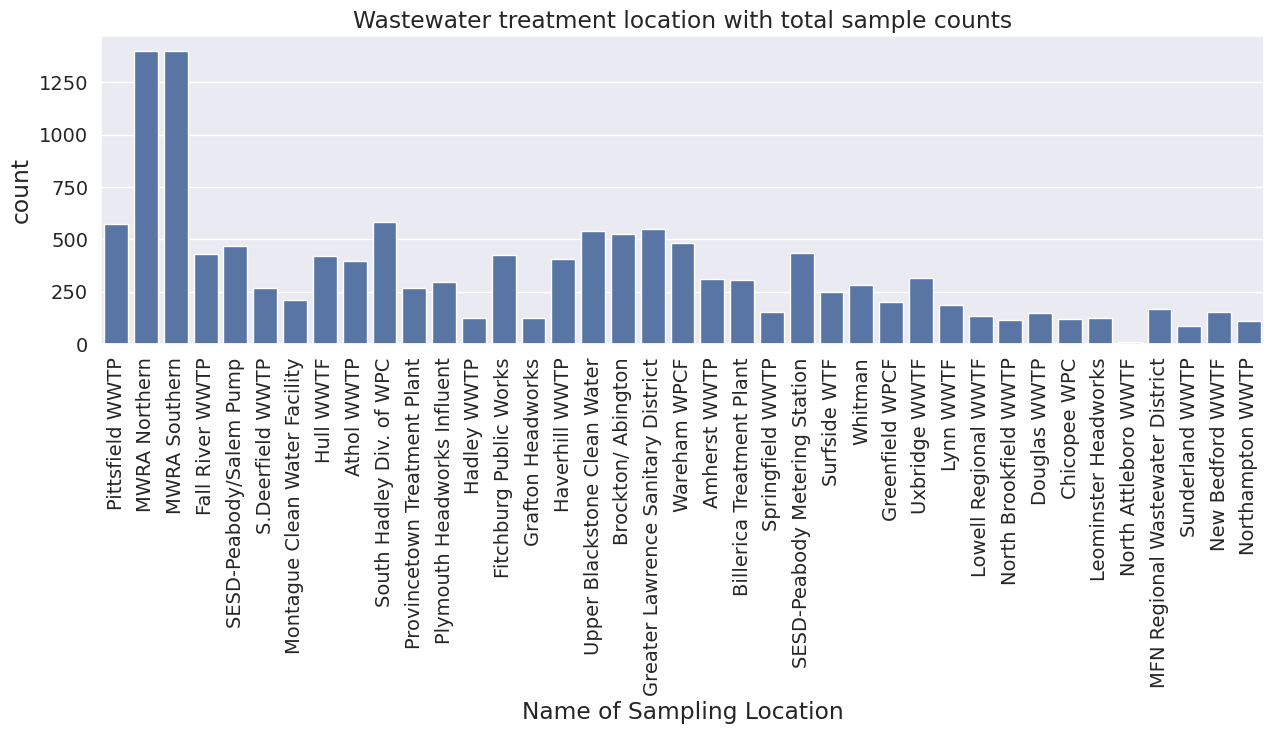

In [18]:
plt.figure(figsize=(15,4))
sns.set(font_scale=(1.4))
sns.countplot(Wastewater_data, x='Name of Sampling Location').set(title='Wastewater treatment location with total sample counts')
plt.xticks(rotation=90, fontsize=14);
plt.yticks(fontsize=14);

In [19]:
conc_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sample collection date                     1480 non-null   datetime64[ns]
 1   7 day average of SARS-CoV-2 concentration  1480 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.3 KB


In [20]:
wastewater_samples_data=pd.merge(samples_by_date, conc_by_date, on='Sample collection date', how='outer')

In [21]:
wastewater_samples_data=pd.merge(wastewater_samples_data, Cov_detected_counts, on='Sample collection date', how='outer')

In [23]:
wastewater_samples_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sample collection date                     1480 non-null   datetime64[ns]
 1   Number of samples in the last 7 days       1480 non-null   int64         
 2   7 day average of SARS-CoV-2 concentration  1480 non-null   float64       
 3   SARS-CoV-2 Detected                        1480 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 46.4 KB


In [30]:
wastewater_samples_data.head(3)

,Sample collection date,Number of samples in the last 7 days,7 day average of SARS-CoV-2 concentration,SARS-CoV-2 Detected
0,2020-03-23,2,254896.998950,0
1,2020-03-24,2,346593.308500,0
2,2020-03-25,5,194182.999284,0


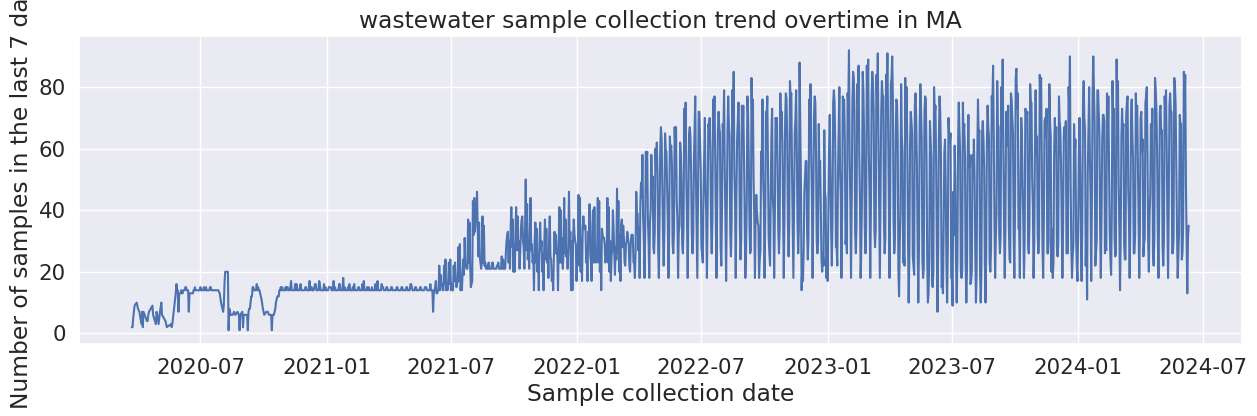

In [24]:
# Comparison overtime with clinical data
plt.figure(figsize=(15,4))
sns.lineplot(samples_by_date, x='Sample collection date', y='Number of samples in the last 7 days').set(title='wastewater sample collection trend overtime in MA');


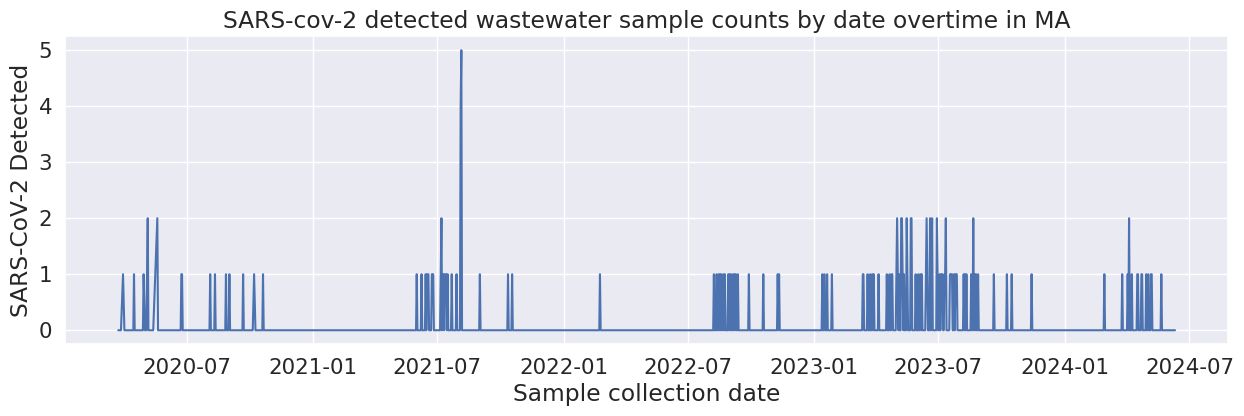

In [25]:
# Comparison overtime with clinical data
plt.figure(figsize=(15,4))
sns.lineplot(wastewater_samples_data, x='Sample collection date', y='SARS-CoV-2 Detected').set(title='SARS-cov-2 detected wastewater sample counts by date overtime in MA');


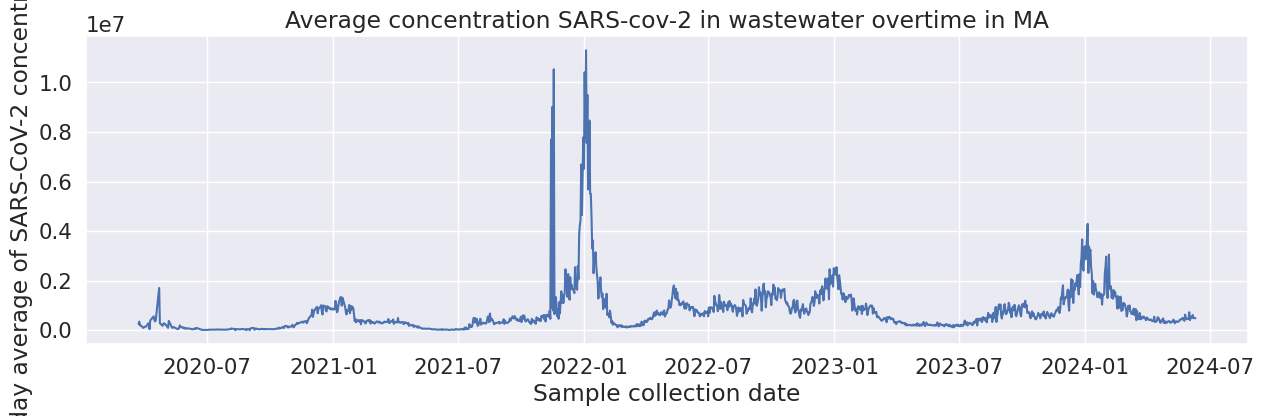

In [26]:
plt.figure(figsize=(15,4))
sns.lineplot(wastewater_samples_data, x='Sample collection date', y='7 day average of SARS-CoV-2 concentration').set(title='Average concentration SARS-cov-2 in wastewater overtime in MA');


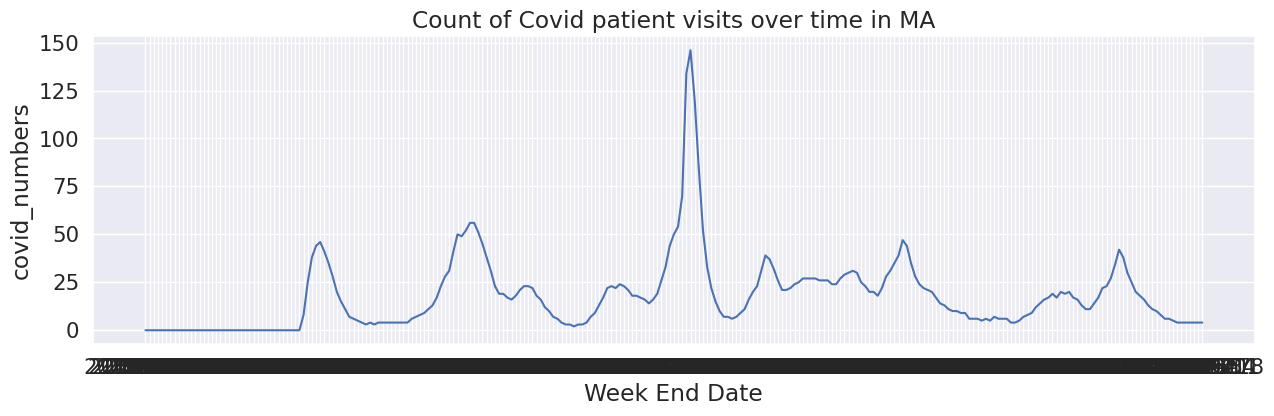

In [27]:
# Comparison overtime with clinical data
# Using covid series generated in last preprocessing
# Taking a copy for future analysis, without redoing all preprocessing
Covid_series=pd.read_csv('/content/Covid_series.csv', index_col=0)
Clinical_count=pd.DataFrame(Covid_series.groupby('Week End Date').sum('covid_numbers')['covid_numbers']).reset_index()
plt.figure(figsize=(15,4))
sns.lineplot(Clinical_count, x='Week End Date', y='covid_numbers').set(title='Count of Covid patient visits over time in MA');



**Observation**
Overall similar trend and use of wastewater as early indicator using predicitive time series models may be possible.

In [28]:
wastewater_samples_data.to_csv('/content/wastewater_samples_data')

## Continue with time series analysis for covid and covid with wastewater as expogenous factors.
